In [2]:
import pandas as pd

# Load the data
file_path = "../data/combined_mutation_CNV.csv"
data = pd.read_csv(file_path)

In [3]:
# Basic statistical summary
data.describe()

,TMB,PGA,SPTA1_Missense_Mutation,SETD2_Missense_Mutation,PRKDC_Missense_Mutation,CSF3R_Missense_Mutation,MYCN_Missense_Mutation,ALK_Missense_Mutation,LRP1B_Missense_Mutation,CTLA4_Missense_Mutation,...,AMER1_logCR,AR_logCR,MED12_logCR,TAF1_logCR,PAK3_logCR,XIAP_logCR,STAG2_logCR,SH2D1A_logCR,BCORL1_logCR,PHF6_logCR
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,37.181395,30.489767,0.372093,0.186047,0.186047,0.093023,0.116279,0.232558,0.488372,0.093023,...,0.049282,0.049282,0.065939,0.065939,0.047817,0.047817,0.047817,0.047817,0.047817,0.047817
std,43.573552,21.974747,0.489083,0.393750,0.393750,0.293903,0.324353,0.427463,0.505781,0.293903,...,0.219765,0.219765,0.247956,0.247956,0.219724,0.219724,0.219724,0.219724,0.219724,0.219724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.423171,-0.423171,-0.423171,-0.423171,-0.423171,-0.423171,-0.423171,-0.423171,-0.423171,-0.423171
25%,9.800000,10.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.057317,-0.057317,-0.057317,-0.057317,-0.057317,-0.057317,-0.057317,-0.057317,-0.057317,-0.057317
50%,19.500000,28.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034892,0.034892,0.034892,0.034892,0.028970,0.028970,0.028970,0.028970,0.028970,0.028970
75%,49.050000,47.535000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.102144,0.102144,0.137173,0.137173,0.100971,0.100971,0.100971,0.100971,0.100971,0.100971
max,177.200000,68.040000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.596857,0.596857,0.802327,0.802327,0.596857,0.596857,0.596857,0.596857,0.596857,0.596857


In [4]:
# Checking for missing values
data.isnull().sum()

Subtype                    0
Sample                     0
TMB                        0
PGA                        0
SPTA1_Missense_Mutation    0
                          ..
XIAP_logCR                 0
STAG2_logCR                0
SH2D1A_logCR               0
BCORL1_logCR               0
PHF6_logCR                 0
Length: 658, dtype: int64

In [5]:
# Calculate the frequency of each mutation type
mutation_columns = [col for col in data.columns if "_Missense_Mutation" in col]
data[mutation_columns].sum().sort_values(ascending=False)

LRP1B_Missense_Mutation     21
ERBB4_Missense_Mutation     18
SPTA1_Missense_Mutation     16
GRIN2A_Missense_Mutation    16
PTPRT_Missense_Mutation     15
                            ..
ETV4_Missense_Mutation       3
FBXW7_Missense_Mutation      3
KDM5A_Missense_Mutation      3
MITF_Missense_Mutation       3
NCOA3_Missense_Mutation      3
Length: 140, dtype: int64

In [8]:
data.dtypes

Subtype                     object
Sample                      object
TMB                        float64
PGA                        float64
SPTA1_Missense_Mutation      int64
                            ...   
XIAP_logCR                 float64
STAG2_logCR                float64
SH2D1A_logCR               float64
BCORL1_logCR               float64
PHF6_logCR                 float64
Length: 658, dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Columns: 658 entries, Subtype to PHF6_logCR
dtypes: float64(512), int64(144), object(2)
memory usage: 221.2+ KB


In [10]:
# Categorize data based on the 'Subtype' column
subtype_groups = data.groupby('Subtype')
pdm_data = subtype_groups.get_group('PDM')
other_data = data[data['Subtype'] != 'PDM']  # Adjust as per other subtypes available

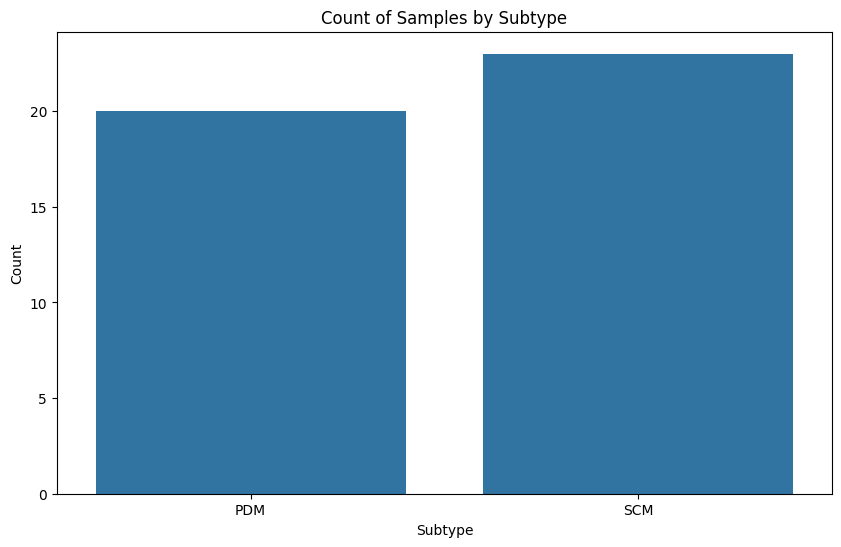

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Samples by Subtype
plt.figure(figsize=(10, 6))
sns.countplot(x='Subtype', data=data)
plt.title('Count of Samples by Subtype')
plt.xlabel('Subtype')
plt.ylabel('Count')
plt.show()

# T-SNE

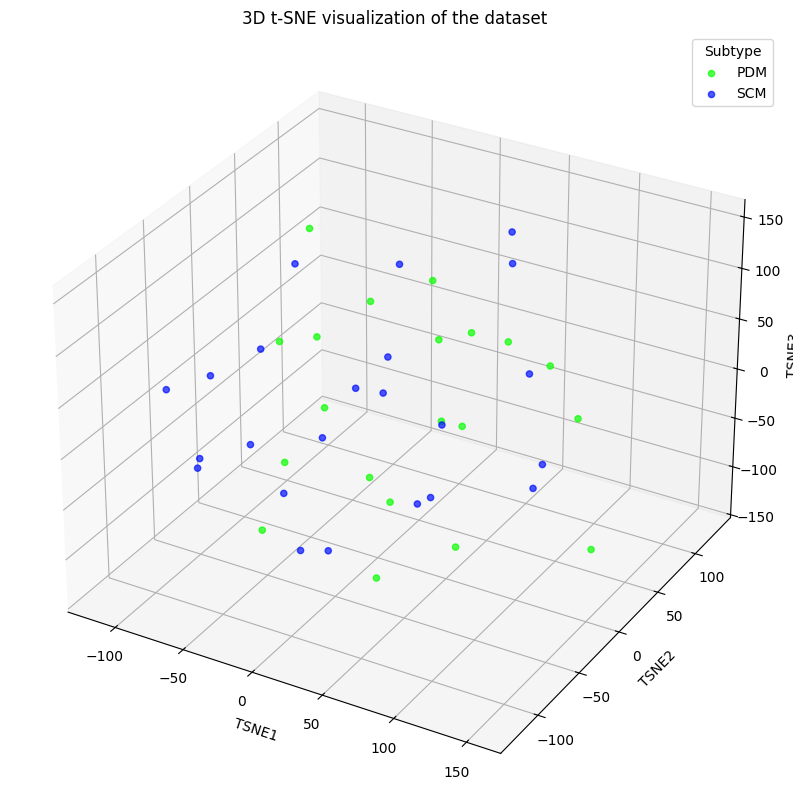

In [5]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/combined_mutation_CNV.csv'
data = pd.read_csv(file_path)

# Extract numeric columns (ignoring 'Subtype' and 'Sample' columns)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Apply t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(numeric_data)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df['Subtype'] = data['Subtype']

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Get unique subtypes
unique_subtypes = tsne_df['Subtype'].unique()

# Create a color palette
palette = sns.color_palette("hsv", len(unique_subtypes))
color_mapping = {subtype: palette[i] for i, subtype in enumerate(unique_subtypes)}

# Plot each subtype with a different color
for subtype in unique_subtypes:
    subset = tsne_df[tsne_df['Subtype'] == subtype]
    ax.scatter(subset['TSNE1'], subset['TSNE2'], subset['TSNE3'], 
               color=color_mapping[subtype], label=subtype, alpha=0.7)

# Add legend
ax.legend(title="Subtype")

# Add axis labels and title
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.title('3D t-SNE visualization of the dataset')
plt.show()

